In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True) 
test_datagen = ImageDataGenerator(rescale=1./255,)

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/IBM/Dataset/Dataset Plant Disease/fruit-dataset/fruit-dataset/train',target_size = (128,128),batch_size = 32, class_mode = 'categorical')

Found 5448 images belonging to 6 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/IBM/Dataset/Dataset Plant Disease/fruit-dataset/fruit-dataset/test',target_size = (128,128),batch_size = 32,class_mode = 'categorical')


Found 1696 images belonging to 6 classes.


In [ ]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten


In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(6,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

171

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
171/171 [==============================] - 37s 215ms/step - loss: 0.6759 - accuracy: 0.8007 - val_loss: 0.3976 - val_accuracy: 0.8550
Epoch 2/10
171/171 [==============================] - 36s 212ms/step - loss: 0.2652 - accuracy: 0.9088 - val_loss: 0.2140 - val_accuracy: 0.9245
Epoch 3/10
171/171 [==============================] - 36s 210ms/step - loss: 0.2217 - accuracy: 0.9269 - val_loss: 0.2333 - val_accuracy: 0.9186
Epoch 4/10
171/171 [==============================] - 37s 218ms/step - loss: 0.1855 - accuracy: 0.9387 - val_loss: 0.2355 - val_accuracy: 0.9180
Epoch 5/10
171/171 [==============================] - 36s 210ms/step - loss: 0.1676 - accuracy: 0.9431 - val_loss: 0.1273 - val_accuracy: 0.9587
Epoch 6/10
171/171 [==============================] - 36s 212ms/step - loss: 0.1370 - accuracy: 0.9558 - val_loss: 0.1602 - val_accuracy: 0.9452
Epoch 7/10
171/171 [==============================] - 37s 218ms/step - loss: 0.1254 - accuracy: 0.9572 - val_loss: 0.1931 - val_ac

In [ ]:
model.save('fruit.h5')

In [40]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model.save('fruit.h5')

In [42]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/01e94c43-0879-4e8c-9b61-c48cfed88dab___JR_FrgE.S 3024.JPG",target_size=(128,128))


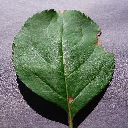

In [43]:
img

In [44]:
x=image.img_to_array(img)


In [45]:
x

array([[[208., 201., 217.],
        [199., 192., 208.],
        [200., 193., 209.],
        ...,
        [181., 173., 196.],
        [180., 172., 195.],
        [185., 177., 200.]],

       [[197., 190., 206.],
        [193., 186., 202.],
        [198., 191., 207.],
        ...,
        [176., 168., 191.],
        [170., 162., 185.],
        [165., 157., 180.]],

       [[201., 194., 210.],
        [201., 194., 210.],
        [193., 186., 202.],
        ...,
        [173., 165., 188.],
        [175., 167., 190.],
        [170., 162., 185.]],

       ...,

       [[132., 118., 133.],
        [140., 126., 141.],
        [126., 112., 127.],
        ...,
        [130., 121., 142.],
        [108.,  99., 120.],
        [120., 111., 132.]],

       [[152., 138., 153.],
        [125., 111., 126.],
        [121., 107., 122.],
        ...,
        [ 90.,  81., 102.],
        [109., 100., 121.],
        [120., 111., 132.]],

       [[111.,  97., 112.],
        [115., 101., 116.],
        [114., 1

In [46]:
x=np.expand_dims(x,axis=0)


In [47]:
x

array([[[[208., 201., 217.],
         [199., 192., 208.],
         [200., 193., 209.],
         ...,
         [181., 173., 196.],
         [180., 172., 195.],
         [185., 177., 200.]],

        [[197., 190., 206.],
         [193., 186., 202.],
         [198., 191., 207.],
         ...,
         [176., 168., 191.],
         [170., 162., 185.],
         [165., 157., 180.]],

        [[201., 194., 210.],
         [201., 194., 210.],
         [193., 186., 202.],
         ...,
         [173., 165., 188.],
         [175., 167., 190.],
         [170., 162., 185.]],

        ...,

        [[132., 118., 133.],
         [140., 126., 141.],
         [126., 112., 127.],
         ...,
         [130., 121., 142.],
         [108.,  99., 120.],
         [120., 111., 132.]],

        [[152., 138., 153.],
         [125., 111., 126.],
         [121., 107., 122.],
         ...,
         [ 90.,  81., 102.],
         [109., 100., 121.],
         [120., 111., 132.]],

        [[111.,  97., 112.],
       

In [48]:
y=np.argmax(model.predict(x),axis=1)


1/1 [==============================] - 0s 104ms/step


In [49]:
x_train.class_indices


{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [51]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']


In [58]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/00a14441-7a62-4034-bc40-b196aeab2785___RS_NLB 3932.JPG",target_size=(128,128))
x=image.img_to_array(img)


In [60]:
index[y[0]]


'Apple___healthy'